### Classificação usando K vizinhos mais próximos (do ingês: K nearest neighboors – KNN)

determinar o rótulo de classificação de uma amostra baseado nas amostras vizinhas advindas de um conjunto de treinamento.

fonte: http://www.computacaointeligente.com.br/algoritmos/knn-k-vizinhos-mais-proximos/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics as mt

usaremos um dataset Iris de classificação de um género de plantas com flor disponivel no nosso github, para obtermos os valores de X e y e assim realizar nossa classificação.

In [2]:
columns = ['sepal_comprimento','sepal_largura','petal_comprimento',
           'petal_largura','tipo']
dataset = pd.read_csv('iris-dataset.csv',names=columns)

In [3]:
dataset.head(10)

,sepal_comprimento,sepal_largura,petal_comprimento,petal_largura,tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [4]:
dataset = dataset.drop(['petal_comprimento','petal_largura'], axis=1)

Vamos tentar classificar o ultimo ponto do nosso conjunto de dados.

In [5]:
dataset.tail(1)

,sepal_comprimento,sepal_largura,tipo
149,5.9,3.0,virginica


Aqui vamos separar o dataset em X e y em traino e teste.

In [6]:
X_train = dataset.values[1:,:-1]
y_train = dataset.values[1:,-1]

In [7]:
X_test = dataset.values[0][:-1]
y_test = dataset.values[0][-1]

Abaixo podemos ver um gráfico com a separação de cada rótulo a partir das características sepal largura e sepal comprimento, caso uma nova amostra entre no conjunto de dados será calculado em base nos dados já existentes a distancia entre esse novo dado e os dados no conjunto, pegar os valores k mais próximos a ele e a partir deles, analisando aquele dado que mais se repetem na amostra de K's.


Gif com os passos do KNN: https://drive.google.com/open?id=1dra3Y9uD3wzTD5Uq1CTEn1FOqBNmQD7I
![](https://drive.google.com/uc?id=1dra3Y9uD3wzTD5Uq1CTEn1FOqBNmQD7I)

Distribuição dos pontos em nosso conjunto de dados.

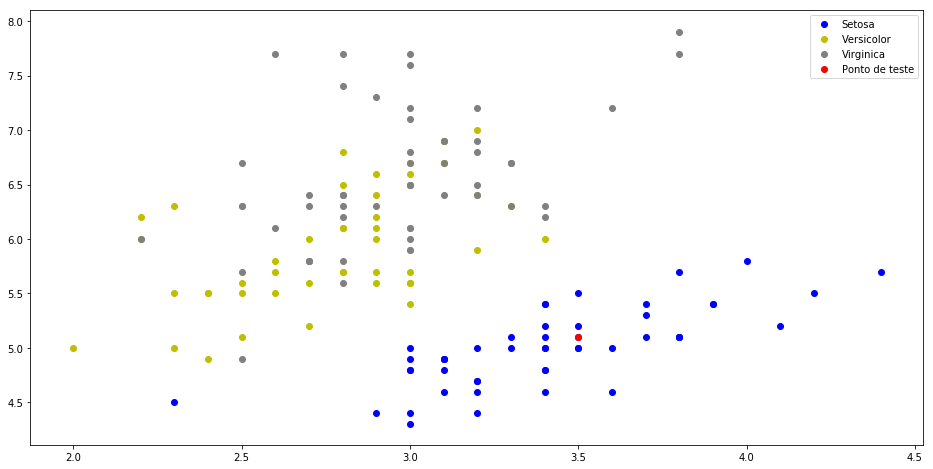

In [8]:
plt.figure(figsize=(16,8))
y_map = {label: idx for idx, label in enumerate(np.unique(dataset['tipo']))}
plt.scatter(X_train[y_train == 'setosa' , 1], X_train[y_train == 'setosa', 0], c='b', label='Setosa')
plt.scatter(X_train[y_train == 'versicolor' , 1], X_train[y_train == 'versicolor', 0], c='y', label='Versicolor')
plt.scatter(X_train[y_train == 'virginica' , 1], X_train[y_train == 'virginica', 0], c='Gray', label='Virginica')
plt.scatter(X_test[1], X_test[0], c='r', label='Ponto de teste')
plt.legend()

Aqui vamos efetivamente criar, treinar e testa o modelo.

In [9]:
model = KNeighborsClassifier(n_neighbors=7, metric='euclidean')

In [10]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

Mostrando os 7 pontos mas proximos do nosso ponto de teste.

In [11]:
pontos = model.kneighbors_graph([X_test], 7).toarray()

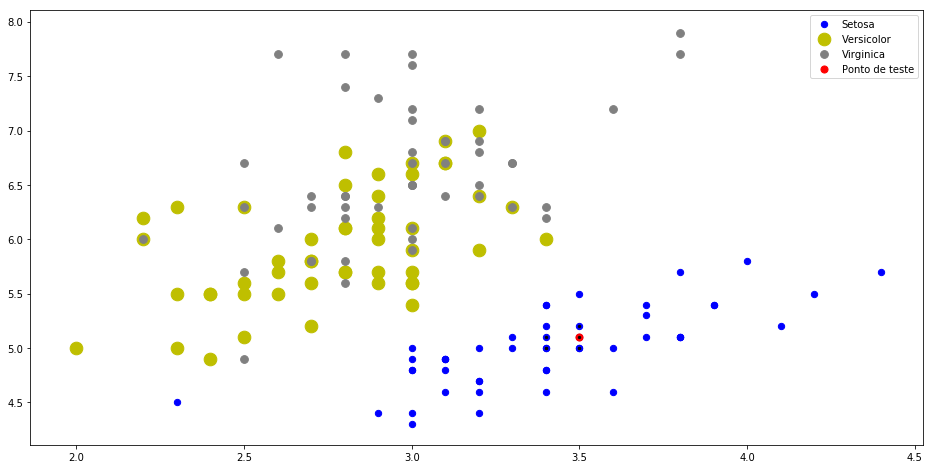

In [12]:
plt.figure(figsize=(16,8))
y_map = {label: idx for idx, label in enumerate(np.unique(dataset['tipo']))}
plt.scatter(X_train[y_train == 'setosa' , 1], X_train[y_train == 'setosa', 0], c='b', label='Setosa', s=40)
plt.scatter(X_train[y_train == 'versicolor' , 1], X_train[y_train == 'versicolor', 0], c='y', label='Versicolor',s=160)
plt.scatter(X_train[y_train == 'virginica' , 1], X_train[y_train == 'virginica', 0], c='Gray', label='Virginica',s=60)
plt.scatter(X_test[1], X_test[0], c='r', label='Ponto de teste', s=50)
plt.scatter(X_train[pontos[0] == 1, 1],X_train[pontos[0] == 1,0], c='Black',s=5)
plt.legend()


O que o modelo consegue predizer.

In [13]:
y_pred = model.predict([X_test])
print (y_pred, y_test)

['setosa'] setosa
